In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("NewCar.csv")
df.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curbweight,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,citympg,highway-mpg,price
0,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,13495.0
1,121.803681,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,9.0,111,5000,21,27.0,16500.0
2,121.803681,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,9.0,154,5000,19,26.0,16500.0
3,164.000000,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,10.0,102,5500,24,30.0,13950.0
4,164.000000,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,8.0,115,5500,18,22.0,17450.0


In [3]:
x=df[['normalized-losses', 'wheel-base', 'length', 'width','height', 'curbweight', 'engine-size',
   'compression-ratio', 'horsepower', 'peak-rpm', 'citympg','highway-mpg']]
y=df['price']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestRegressor
l=RandomForestRegressor(n_estimators=65)
l.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=65, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [6]:
prediction=l.predict(X_test)

In [7]:
prediction

array([25078.63076923, 18854.48461538, 17244.38461538, 10410.8966122 ,
       21496.06153846, 12254.33454231, 10628.48076923, 18246.46153846,
       20029.76923077,  7910.75384615, 27388.46153846,  8147.72307692,
       11646.12738143,  8808.27692308, 12270.64599442, 12746.18326026,
        8267.92287764,  8966.2825827 , 12270.64599442, 10584.74276604,
       18279.15384615,  9293.66153846,  7346.98974359,  8679.445277  ,
       23793.39487179, 24872.23076923, 10880.6165936 , 10006.66018334,
        9012.66923077, 23742.31794872, 21967.90769231, 22171.6       ,
       25247.09230769, 21877.72307692,  6830.94265577, 14899.36923077,
        8162.28906603,  7771.11470705, 11653.03507373,  8785.52225322,
       14257.15384615, 19835.76923077,  7249.97333333,  9779.80769231,
        7143.09752757,  7328.94871795, 14716.75384615,  8307.78373854,
       10848.17584695,  9463.00957885,  7483.92307692, 11861.11335193,
        6917.55384615, 13131.90957885, 13214.54595456,  7044.58137372,
      

In [8]:
y_test.head()

15     27500.000000
9      12663.455959
115    18150.000000
78      9959.000000
66     27500.000000
Name: price, dtype: float64

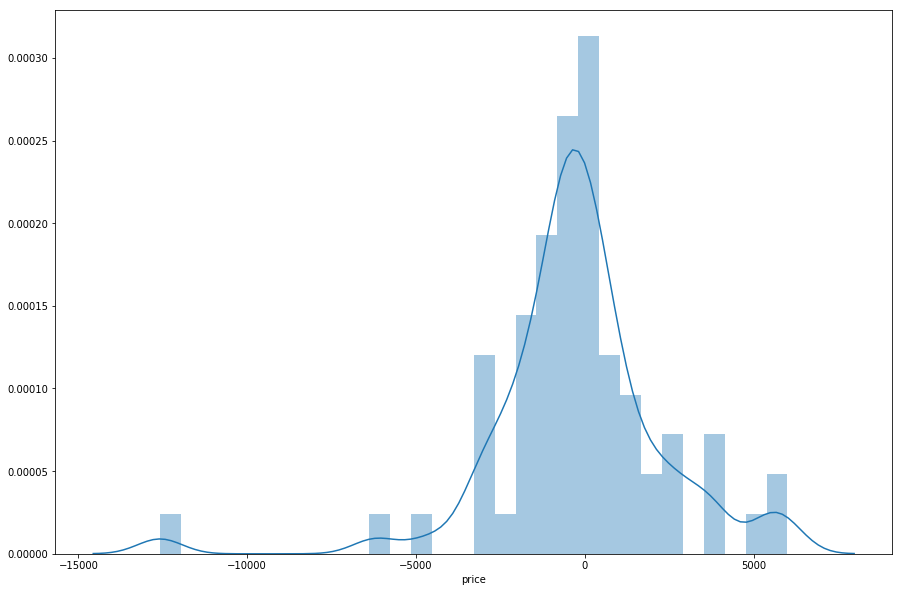

In [9]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [10]:
from sklearn import metrics

In [11]:
metrics.mean_absolute_error(y_test,prediction)

1745.4488776325627

In [12]:
metrics.mean_squared_error(y_test,prediction)

7110913.797267911

In [13]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

2666.629670064426

In [14]:
accuracy = l.score(X_test,y_test)

In [15]:
print(accuracy*100,'%')

84.12973462048117 %


In [16]:
metrics.r2_score(y_train,l.predict(X_train))

0.9779099562811425

In [17]:
metrics.r2_score(y_test,prediction)

0.8412973462048118

# Using categorical variable too

In [18]:
df=pd.read_csv("CategoriacalCar.csv")
df.head()

,normalized-losses,wheel-base,length,width,height,curbweight,engine-size,compression-ratio,horsepower,peak-rpm,...,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,price
0,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,13495.0
1,121.803681,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,16500.0
2,121.803681,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,...,0,0,0,0,0,0,0,1,0,16500.0
3,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,13950.0
4,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,17450.0


In [19]:
a=['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curbweight', 'compression-ratio', 'horsepower',
      'citympg',  'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rear',  'four', 'six', 'three',
        '1bbl', '2bbl', 'idi', 'mfi', 'mpfi',
       'spdi']

In [20]:
y=df['price']
#x=df.iloc[:,:-1]
x=df[a]
x.head()

,normalized-losses,wheel-base,length,width,height,curbweight,compression-ratio,horsepower,citympg,gas,...,rear,four,six,three,1bbl,2bbl,idi,mfi,mpfi,spdi
0,121.803681,88.6,168.8,64.1,48.8,2548,9.0,111,21,1,...,0,1,0,0,0,0,0,0,1,0
1,121.803681,88.6,168.8,64.1,48.8,2548,9.0,111,21,1,...,0,1,0,0,0,0,0,0,1,0
2,121.803681,94.5,171.2,65.5,52.4,2823,9.0,154,19,1,...,0,0,1,0,0,0,0,0,1,0
3,164.000000,99.8,176.6,66.2,54.3,2337,10.0,102,24,1,...,0,1,0,0,0,0,0,0,1,0
4,164.000000,99.4,176.6,66.4,54.3,2824,8.0,115,18,1,...,0,0,0,0,0,0,0,0,1,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
l=RandomForestRegressor(n_estimators=70)
l.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
prediction=l.predict(X_test)

In [24]:
prediction

array([24153.3       , 19425.32857143, 17167.38571429, 10723.89896373,
       22027.55714286, 12957.39761905, 11361.34937084, 18569.        ,
       20430.92857143,  7966.67142857, 25672.85714286,  8148.04937084,
       11828.48445596,  8608.18571429, 11697.16728349, 12089.13508512,
        8820.68763879,  8895.238453  , 11697.16728349, 10935.87017024,
       18934.52857143,  9269.26365655,  7204.22857143,  9400.28638046,
       22644.25238095, 24238.65714286, 11549.8546262 , 10078.55714286,
        9066.32857143, 22700.08095238, 22482.02142857, 23154.87857143,
       23307.52857143, 21291.74285714,  6543.1547619 , 15800.44285714,
        8083.52079941,  8114.78034049, 11828.48445596,  8928.90350358,
       14039.85714286, 19767.14285714,  6825.1       ,  9653.99285714,
        6658.0102381 ,  7051.90714286, 15714.42857143,  9099.87209474,
       11525.96350851,  9406.74159882,  7624.35714286, 12525.83508512,
        6850.17142857, 12346.95882679, 12379.19896373,  6561.72571429,
      

In [25]:
y_test.head()

15     27500.000000
9      12663.455959
115    18150.000000
78      9959.000000
66     27500.000000
Name: price, dtype: float64

In [26]:
plt.figure(figsize = (15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

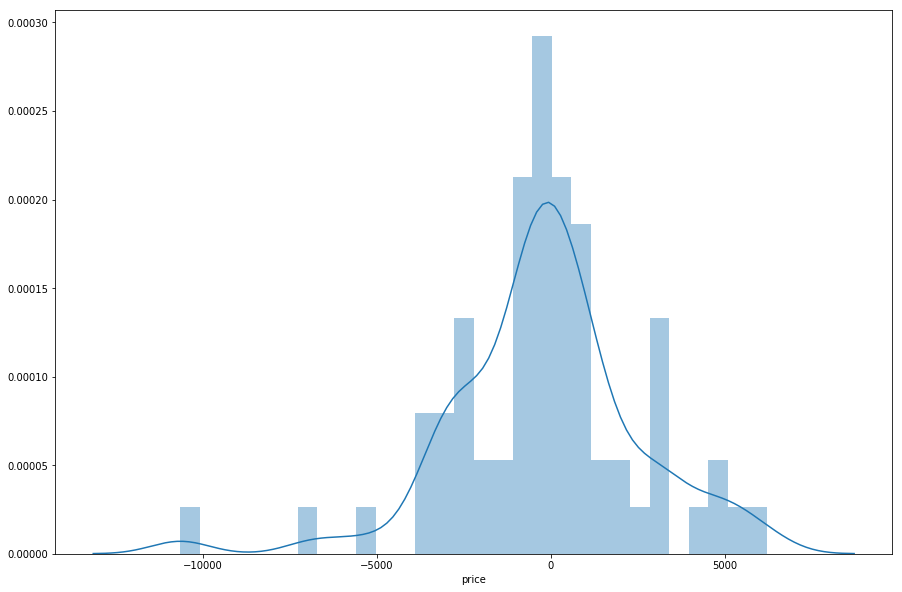

In [27]:
plt.figure(figsize = (15,10))
sns.distplot(y_test-prediction,bins=30)

In [28]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)

1936.3151903693956

In [29]:
metrics.mean_squared_error(y_test,prediction)

7531473.72229514

In [30]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

2744.3530607950465

In [31]:
accuracy = l.score(X_test,y_test)

In [32]:
print(accuracy*100,'%')

83.19112141148165 %


In [33]:
metrics.r2_score(y_train,l.predict(X_train))

0.9744141093117907

In [34]:
metrics.r2_score(y_test,prediction)

0.8319112141148165